In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

file = pd.read_csv("Data/UK_Used_Car_Data_set/toyota.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [8]:
file.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


<AxesSubplot:xlabel='year', ylabel='Count'>

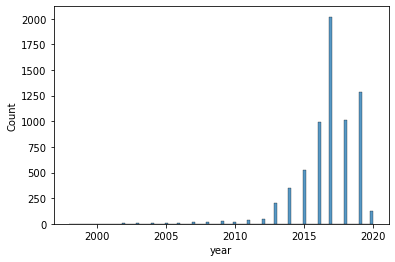

In [14]:
sns.histplot(data=file, x="year")

<AxesSubplot:xlabel='price', ylabel='Count'>

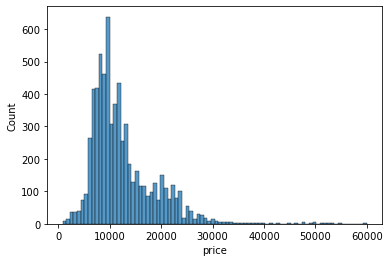

In [9]:
sns.histplot(data=file, x="price")

<AxesSubplot:xlabel='mileage', ylabel='Count'>

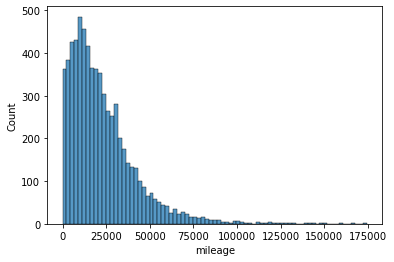

In [10]:
sns.histplot(data=file, x="mileage")

<AxesSubplot:xlabel='tax', ylabel='Count'>

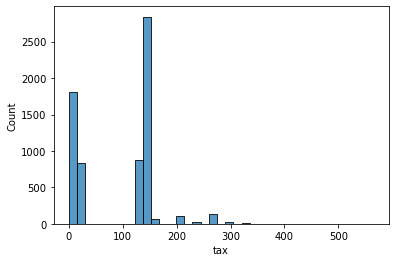

In [11]:
sns.histplot(data=file, x="tax")

<AxesSubplot:xlabel='mpg', ylabel='Count'>

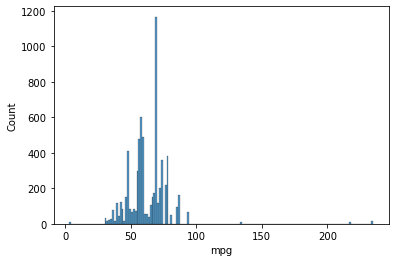

In [12]:
sns.histplot(data=file, x="mpg")

<AxesSubplot:xlabel='engineSize', ylabel='Count'>

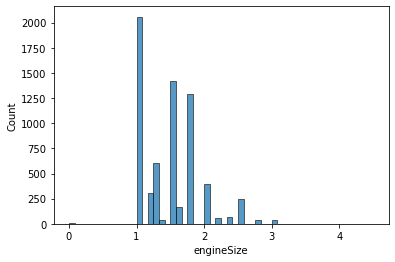

In [13]:
sns.histplot(data=file, x="engineSize")

<AxesSubplot:title={'center':'price'}, xlabel='year'>

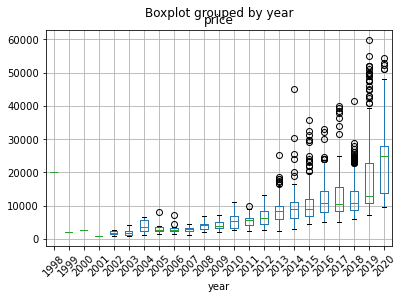

In [16]:
file.boxplot(by ='year', column =["price"], grid = True, rot = 45)

<AxesSubplot:title={'center':'price'}, xlabel='model'>

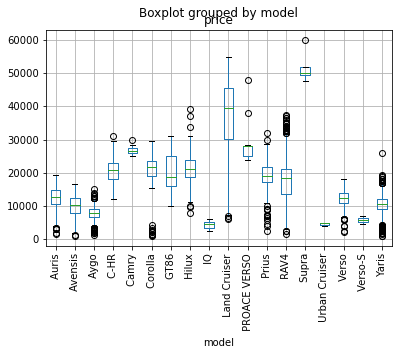

In [22]:
file.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:title={'center':'mileage'}, xlabel='year'>

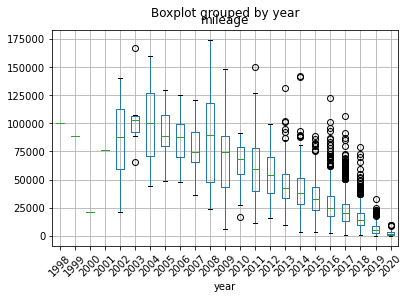

In [17]:
file.boxplot(by ='year', column =["mileage"], grid = True, rot = 45)

<AxesSubplot:title={'center':'tax'}, xlabel='year'>

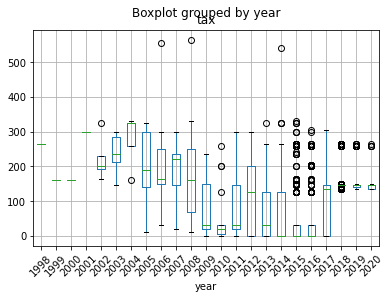

In [18]:
file.boxplot(by ='year', column =["tax"], grid = True, rot = 45)

<AxesSubplot:title={'center':'mpg'}, xlabel='year'>

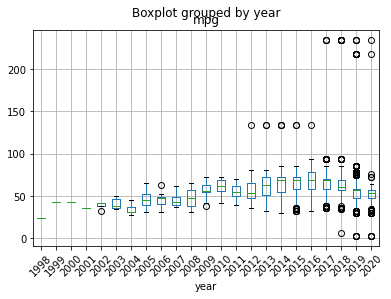

In [19]:
file.boxplot(by ='year', column =["mpg"], grid = True, rot = 45)

<AxesSubplot:title={'center':'engineSize'}, xlabel='year'>

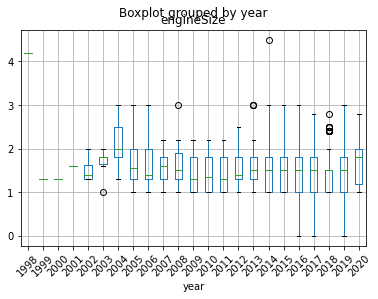

In [20]:
file.boxplot(by ='year', column =["engineSize"], grid = True, rot = 45)

In [33]:
file.model == "Aygo"

0       False
1       False
2       False
3       False
4       False
        ...  
6733    False
6734    False
6735    False
6736    False
6737    False
Name: model, Length: 6738, dtype: bool

In [34]:
file.model.value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [35]:
file.model.unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [37]:
file["model"] = [x.strip() for x in file.model]

In [38]:
mask = (file["model"] == "Aygo")|(file["model"] == "Yaris")
df2 = file.loc[mask,:]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0
